# Representação de Informação e Conhecimento

> Professor Guilherme Aldeia, inspirado nos materiais do Professor Henrique Ferreira, 2022

-----

Neste Jupyter iremos carregar diferentes arquivos em diferentes formatos e representar informação de diferentes maneiras.

A ideia é compreender como o computador armazenada dados, o que são codecs e encodings, o que é uma Estrutura de Dados, e como podemos utilizar esses conceitos para representar Informação e Conhecimento.

Usaremos a linguagem de programação Python para fazer isso.

# Entendendo alguns conceitos em python

Antes de dar início à nossa exploração de dados, vamos entender alguns conceitos que poderão ajudar a manipular os arquivos e a realizar o checkpoint.

**Uma variável** é um espaço na memória do computador que é reservada para armazenar algum dado durante a execução do programa. São como "caixas" onde guardamos um valor.

Nós criamos uma variável dando um nome a ela, que precisa iniciar com um caractere do alfabeto, mas pode conter qualquer caractere alfanumérico ou underline (_) após o primeiro caractere. Ao criar uma variável, devemos atribuir um valor para ela, o "valor que fica dentro da caixinha reservada".

In [1]:
numero_inteiro = 5
numero_real    = 1.14

texto_com_aspas_duplas  = "eu sou uma 'string' (variável textual)"
texto_com_aspas_simples = 'eu sou uma "string", mas com aspas simples'

# Podemos imprimir na tela valores de variáveis com o comando print
print(numero_inteiro)
print(numero_real)
print(texto_com_aspas_duplas)
print(texto_com_aspas_simples)

5
1.14
eu sou uma 'string' (variável textual)
eu sou uma "string", mas com aspas simples


In [2]:
_var   = 42
__var  = 42
_      = 42 # variável dont care
my_var = 42

lista = [1,2,3,4,5]
tupla = (1,2,3,4,5)

# tupla[1] = 10 -- erro

tupla_nomes = ('Baccan', 25)
nome, idade = tupla_nomes

print(nome, idade)

tupla_nomes_2 = ('Baccan', 25, '2TDCR')
nome, _, turma = tupla_nomes_2

print(nome, turma)

Baccan 25
Baccan 2TDCR


Podemos realizar operações aritméticas com variáveis numéricas. Isso significa que podemos fazer multiplicação, divisão, soma e subtração.

Para variáveis strings, podemos acessar substrings, que seriam fragmentos da string.

In [3]:
numero_inteiro = 5
numero_real = 1.14

print(numero_inteiro * numero_real)  # multiplicação
print(numero_inteiro / numero_real)  # Divisão
print(numero_inteiro + numero_real)  # Soma
print(numero_inteiro - numero_real)  # Subtração
print(numero_inteiro // 3) # Divisão inteira (sem nada após o ponto)
print(numero_inteiro % 3)  # módulo - resto da divisão inteira de numero_inteiro por 3

5.699999999999999
4.385964912280702
6.14
3.8600000000000003
1
2


## Exemplo 1 - Carregando um arquivo de texto

O comando **open** é usado para abrir arquivos. O **with** é usado para garantir finalização do arquivo depois de aberto de maneira segura. 

Quando um arquivo é aberto, ele pode ser aberto para leitura ('r'), escrita ('w'), acrescentar ('a') ou ler como binário ('rb').

Mais informações em https://docs.python.org/3/library/io.html

In [4]:
with open('dados/texto_ansi.txt', 'r', encoding='latin-1') as file:
    print(file)               # Printando o que foi carregado na variável file ao abrir o arquivo
    print(type(file))         # Printando o tipo de dado (estrutura) da variavel file
    linhas = file.readlines() # Readlines é um método da classe _io.TextIOWrapper que lê as linhas do arquivo
    print(linhas)             # Printando o que foi carregado na variável linhas ao ler as linhas do arquivo

    # qual a diferença entre readlines e read?
    # readlines retorna uma lista de strings, cada string é uma linha do arquivo
    # read retorna uma string com todo o conteúdo do arquivo

<_io.TextIOWrapper name='dados/texto_ansi.txt' mode='r' encoding='latin-1'>
<class '_io.TextIOWrapper'>
['Este é um arquivo de texto condificado em ansi. \n', 'Contendo carateres da língua portuguesa como ç e vários símbolos gráficos !@#$%%¨\n', 'A acentuação das palavras como macarrão, vírus, silêncio, ações e ginásio podem ser exibidas erradas se o encoding de texto não for usado certo.\n']


In [5]:
file = open('dados/texto_ansi.txt', 'r', encoding='latin-1')

#print(file)
print(type(file))
print(file.read())

<class '_io.TextIOWrapper'>
Este é um arquivo de texto condificado em ansi. 
Contendo carateres da língua portuguesa como ç e vários símbolos gráficos !@#$%%¨
A acentuação das palavras como macarrão, vírus, silêncio, ações e ginásio podem ser exibidas erradas se o encoding de texto não for usado certo.



Perceba que o objto TextIOWrapper tem um atributo encoding que codifica os carateres do tipo cp1252 presentes na string de texto. Este encoding é referente ao alfabeto Latino em sistemas Windows (https://en.wikipedia.org/wiki/Windows-1252).

In [6]:
print(linhas) 
print(type(linhas)) # As linhas são armazenadas em uma lista (vetor) de strings

['Este é um arquivo de texto condificado em ansi. \n', 'Contendo carateres da língua portuguesa como ç e vários símbolos gráficos !@#$%%¨\n', 'A acentuação das palavras como macarrão, vírus, silêncio, ações e ginásio podem ser exibidas erradas se o encoding de texto não for usado certo.\n']
<class 'list'>


In [7]:
for linha in linhas:  # printando as linhas
    print(linha)

Este é um arquivo de texto condificado em ansi. 

Contendo carateres da língua portuguesa como ç e vários símbolos gráficos !@#$%%¨

A acentuação das palavras como macarrão, vírus, silêncio, ações e ginásio podem ser exibidas erradas se o encoding de texto não for usado certo.



Vamos supor que nosso código espere texto codificado em UTF-8.

Entretanto nosso arquivo de texto está codificado em ANSI (uma extensão do ASCII para arquivos do Windows).

Vejamos o que acontece:

In [8]:
with open('dados/texto_ansi.txt', 'r', encoding="utf-8", errors='ignore') as file:
    linhas = file.readlines()

print(linhas)

['Este  um arquivo de texto condificado em ansi. \n', 'Contendo carateres da lngua portuguesa como  e vrios smbolos grficos !@#$%%\n', 'A acentuao das palavras como macarro, vrus, silncio, aes e ginsio podem ser exibidas erradas se o encoding de texto no for usado certo.\n']


In [9]:
with open('dados/texto_ansi.txt', 'r', encoding="latin-1") as file:
    linhas = file.readlines()
    
print(linhas)

['Este é um arquivo de texto condificado em ansi. \n', 'Contendo carateres da língua portuguesa como ç e vários símbolos gráficos !@#$%%¨\n', 'A acentuação das palavras como macarrão, vírus, silêncio, ações e ginásio podem ser exibidas erradas se o encoding de texto não for usado certo.\n']


Além disso podemos ver o arquivo em seu formato binário salvo:

In [10]:
with open('dados/texto_ansi.txt', 'rb') as file:
    print(file)
    print(type(file))
    linhas = file.readlines()

<_io.BufferedReader name='dados/texto_ansi.txt'>
<class '_io.BufferedReader'>


In [11]:
print(linhas)

[b'Este \xe9 um arquivo de texto condificado em ansi. \r\n', b'Contendo carateres da l\xedngua portuguesa como \xe7 e v\xe1rios s\xedmbolos gr\xe1ficos !@#$%%\xa8\r\n', b'A acentua\xe7\xe3o das palavras como macarr\xe3o, v\xedrus, sil\xeancio, a\xe7\xf5es e gin\xe1sio podem ser exibidas erradas se o encoding de texto n\xe3o for usado certo.\r\n']


O Python 3 por padrão usa o Unicode (como o UTF-8). 

Os encodings nada mais são do que uma tabela que mapeia a representação gráfica do caracter na tela com uma sequência de bits (byte) que codifica aquele caracter específico.

Veja a imagem abaixo extraída de https://towardsdatascience.com/a-guide-to-unicode-utf-8-and-strings-in-python-757a232db95c

![image.png](https://miro.medium.com/max/1400/1*f0Ies7zKYjat2ymtBusaFw.png)

In [12]:
for linha in linhas:
    print(linha)

b'Este \xe9 um arquivo de texto condificado em ansi. \r\n'
b'Contendo carateres da l\xedngua portuguesa como \xe7 e v\xe1rios s\xedmbolos gr\xe1ficos !@#$%%\xa8\r\n'
b'A acentua\xe7\xe3o das palavras como macarr\xe3o, v\xedrus, sil\xeancio, a\xe7\xf5es e gin\xe1sio podem ser exibidas erradas se o encoding de texto n\xe3o for usado certo.\r\n'


Além disso, podemos forçar a decodificação dos carateres usando um encoding posteriormente ao carregamento do arquivo em formato binário, como feito abaixo:

In [13]:
for linha in linhas:
    #print(linha.decode('utf-8'))
    print(linha.decode('latin-1'))
     

Este é um arquivo de texto condificado em ansi. 

Contendo carateres da língua portuguesa como ç e vários símbolos gráficos !@#$%%¨

A acentuação das palavras como macarrão, vírus, silêncio, ações e ginásio podem ser exibidas erradas se o encoding de texto não for usado certo.



In [14]:
a = 10
b = 10.25
print(b)
print(type(b))

10.25
<class 'float'>


In [15]:
linha[0]
'0b1000001'

'0b1000001'

## Exemplo 2 - Entendendo Imagens

In [16]:
with open('dados/lena.png', 'r') as file:
    print(file)
    print(type(file))

    # Vai dar erro!
    print(file.read())

<_io.TextIOWrapper name='dados/lena.png' mode='r' encoding='cp1252'>
<class '_io.TextIOWrapper'>


UnicodeDecodeError: 'charmap' codec can't decode byte 0x8d in position 65: character maps to <undefined>

Vamos usar bibliotecas que nos ajudam a ler as imagens da maneira correta.

Nas imagens a questão dos encodings recebe outro nome: **codecs**. Os codecs podem se referenciar tanto para imagem, quanto para áudio digital e vídeo. Em geral os codecs estão associados a extensão do arquivo (ex: .png, .jpg, .ogg, .mp3, .mp4, etc).

Os codecs não só codificam a imagem em bytes mas também servem para adicionar uma camada de inteligência a essa codificação, permitindo a compressão de dados (ver https://pt.wikipedia.org/wiki/Compress%C3%A3o_de_dados).

Vamos usar três bibliotecas:

In [2]:
from IPython.display import display  # Para mostrar imagens no Jupyter inline
from PIL import Image                # Para carregar imagens no python
# from IPython.display import Image as IPythonImage # com alias (apelido) de Image

In [11]:
imagem = Image.open('dados/lena.png') # Carregando imagem usando o PIL

In [19]:
print(type(imagem)) # O objeto 'imagem' criado pela classe Image do PIL foi identificado como .png 
print(imagem) # Ao printar o objeto já vemos que a imagem tem 512x512 pixels é do tipo RBG
# Além disso, perceba que sabemos qual é a posição da memória RAM onde o objeto está instanciado

<class 'PIL.PngImagePlugin.PngImageFile'>
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x1D2BEB4AE50>


In [20]:
imagem.show() # Esse comando é nativo do PIL e não abre a imagem inline no Jupyter

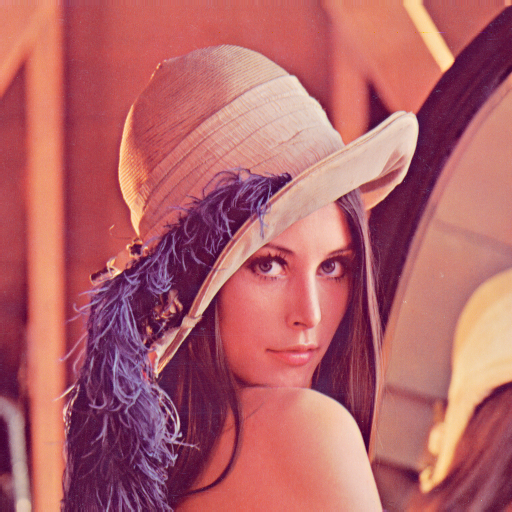

In [21]:
display(imagem) # Agora printando a imagen inline usando o IPython

In [ ]:
width, height = imagem.size # O objeto imagem do PIL tem um atributo size em pixels
print(width, height)

512 512


In [ ]:
imagem.filename # O objeto também tem um atributo nome (caminho) do arquivo da imagem carregada

'dados/lena.png'

In [ ]:
imagem.format # Printa o formato da imagem

'PNG'

In [ ]:
imagem.mode

'RGB'

In [ ]:
imagem.getbands()

('R', 'G', 'B')

In [ ]:
imagem.getpixel((200,250)) # Pega o valor do pixel em uma posicao da imagem
#(0,0) é o canto superior esquerdo

(88, 17, 60)

<PIL.Image.Image image mode=L size=512x512 at 0x7F86D464D110>


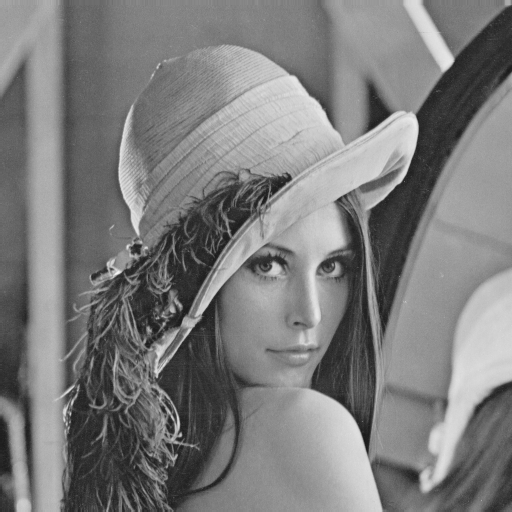

In [ ]:
# Podemos converter para canal monocromatico
img_grey = imagem.convert("L")
print(img_grey)
img_grey

In [22]:
raw_imagem = imagem.tobytes() # Pegando a imagem em bytes usando o método tobytes

In [ ]:
print(raw_imagem) 

Output hidden; open in https://colab.research.google.com to view.

O formato PNG adiciona uma série de informações que não permite identificarmos de maneira clara onde está cada pixel da matriz da imagem quando olhamos para o código binário.

Isso acontece pois o PNG adiciona um cabeçalho (header) com uma série de chunks (fragmentos de informação sequenciais) para representar a imagem. Para entendermos exatamente o que o código binário significa, precisariamos olhar a documentação do PNG (ver https://en.wikipedia.org/wiki/Portable_Network_Graphics).

Agora vamos usar o Numpy e o Matplotlib para ver a imagem como uma matriz

In [3]:
import numpy as np  # Numpy é uma biblioteca para trabalhar com números

# Matplotlib trabalha com gráficos
import matplotlib.pyplot as plt

In [8]:
lista_nativa = [1, 2, 3] #criamos uma lista usando cochetes

a = np.array([1, 2, 3]) #criamos um np.array passando uma lista

print(a) # imprimindo numpy array
print(lista_nativa) # lista nativa de python
print(type(a)) # vendo o tipo da variável `a`

a * 2 # multiplicando todos os elementos por 2

[1 2 3]
[1, 2, 3]
<class 'numpy.ndarray'>


array([2, 4, 6])

In [ ]:
a = np.array([1, 2, 3])

print(a * 5)
print(a**2)

[ 5 10 15]
[1 4 9]


In [12]:
im_array = np.array(imagem) # Carregando o objeto imagem (classe PIL Image) como um objeto numpy array

In [ ]:
im_array

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]

In [16]:
im_array.shape

(512, 512, 3)

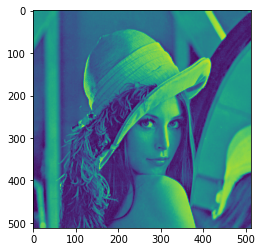

In [ ]:
imgplot = plt.imshow(im_array[:, :, 1])

In [ ]:
2**8

256

In [ ]:
len(im_array)

512

In [ ]:
im_array.size

786432

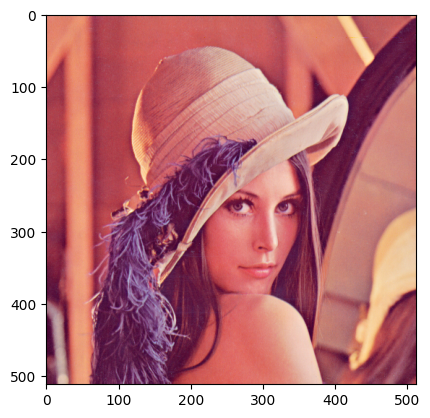

In [17]:
imgplot = plt.imshow(im_array)

## Exemplo 3 - Áudio

Vamos carregar um arquivo de áudio usando a biblioteca Librosa.

https://librosa.org/doc/latest/index.html

In [ ]:
import librosa                   # Processamento de áudio
import librosa.display           # Plot de gráficos
import matplotlib.pyplot as plt  # Plot de gráficos

import IPython  # Para tocar o áudio no Jupyter

In [ ]:
sinal, sr = librosa.load('dados/aeiou_ruido.wav', sr=44100) # Carregando

In [ ]:
type(sinal) # O librosa usa o numpy para guardar o sinal de áudio

numpy.ndarray

In [ ]:
print(sinal.size) #total
print(sinal.size/44100) #duração em segundos

206848
4.690430839002268


In [ ]:
sinal # O sinal é um array numpy de uma dimensão onde cada valor é um float de 32 bits

array([-7.7514648e-03, -7.6904297e-03, -6.5002441e-03, ...,
       -3.0517578e-04, -8.5449219e-04, -3.0517578e-05], dtype=float32)

In [ ]:
sinal[0], sinal[800]

(-0.007751465, -0.050109863)

In [ ]:
len(sinal) # Este é o número de amostras totais do áudio
# sinal.size

206848

In [ ]:
sr # É a taxa de amostragem do sinal, isto é, amostra de amplitude por segundo

44100

In [ ]:
len(sinal)/sr # Logo o tempo total do áudio é de 4.7 segundos aproximadamente

4.690430839002268

Text(18.75, 0.5, 'Amplitude (a.u.)')

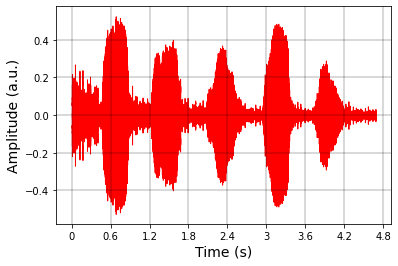

In [ ]:
librosa.display.waveshow(sinal, sr=sr,color='r')
plt.grid(color='k', linestyle='-', linewidth=0.3)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Amplitude (a.u.)', fontsize=14)

In [ ]:
IPython.display.Audio('dados/aeiou_ruido.wav')

In [ ]:
44100*0.5

22050.0

In [ ]:
sinal2 = sinal.copy()

In [ ]:
np.max(sinal2)

0.42733765

In [ ]:
len(sinal), len(sinal2)

(206848, 206848)

In [ ]:
for i in range(0, 44100):
    sinal2[i] = 0.2

In [ ]:
import soundfile as sf

In [ ]:
sf.write('dados/aeiou2.wav', sinal2, samplerate=44100, format='wav')

In [ ]:
IPython.display.Audio('dados/aeiou2.wav')

O arquivo de áudio tem suas particularidades assim como os arquivos de texto e imagens. Arquivos no formato WAV são os mais fáceis de entender pois não possuem compressão. Já mp3 e .opus (.ogg) possuem compressão cuja especificação precisa ser estudada.

Como já fizemos vários exemplos discutindo encoding e codecs, vamos discutir algo diferente neste exemplo.

Como podemos representar conhecimento em relação ao áudio? Uma opção interessante usada pelos Reconhecedores de Falas é a Extração de Features.  Features são atributos do áudio que podem ser usados para representá-lo, por exemplo, propriedades físicas da onda sonora.

Uma propriedade física bem comum no áudio é a frequência do som (o tom da corda do violão ou altura musical - não confundir com volume sonoro). Existe uma frequência característica de cada vogal em português.

Para ver isso, vamos plotar um gráfico diferente chamado de Espectrograma:

Text(0, 0.5, 'Frequency (Hz)')

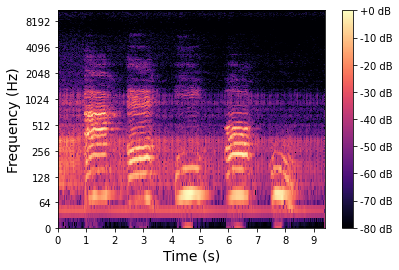

In [ ]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(sinal)), ref=np.max)
librosa.display.specshow(D, y_axis='log',x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Frequency (Hz)', fontsize=14)

Text(18.75, 0.5, 'Amplitude (a.u.)')

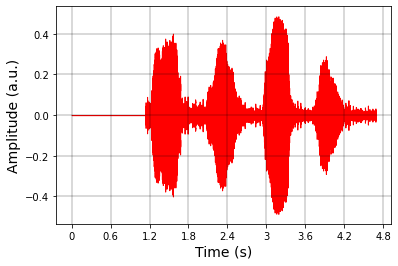

In [ ]:
librosa.display.waveshow(sinal2, sr=sr,color='r')
plt.grid(color='k', linestyle='-', linewidth=0.3)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Amplitude (a.u.)', fontsize=14)

Text(0, 0.5, 'Frequency (Hz)')

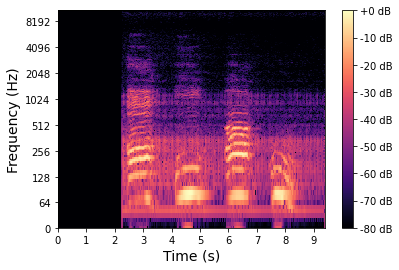

In [ ]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(sinal2)), ref=np.max)
librosa.display.specshow(D, y_axis='log',x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Frequency (Hz)', fontsize=14)

## Exemplo 4 - Tabelas

Normalmente tabelas estão em arquivos de texto do tipo .csv ou em arquivos Microsoft Excel .xlsx.

Podemos carregar a tabela na mão quando é um csv, bastando saber o separador usado. Mas para carregar xlsx e outros formatos de tabelas, vamos precisar de uma biblioteca.

A melhor biblioteca para se trabalhar com Tabelas em Python é o Pandas. Vejamos:

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('dados/gaf_esp.csv', sep=';') 
# Estamos carregando o arquivo csv usando o ; como separador

Os dados carregados no pandas estão em uma estrutura de dados chamada DataFrame. Este é o objeto que o pandas cria para representar os dados da tabela. Como todo objeto em POO (programação orientada à objeto), ele possui métodos que podem ser chamados. 

Para chamar um método de um objeto, basta escrever o nome da variável do objeto e colocar um . (ponto) na frente, evocando na sequência o nome do método seguido de  parenteses (arg), onde os argumentos arg podem ou não ser passados, dependendo do método.

Vejamos dois exemplos de head():

In [ ]:
dados.head(2) # o número passado para o método head é o número de linhas que queremos ver (por default 5)
#dados.head(20)
#dados.head(200)

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.5,7.0
1,Gafanhoto,0.5,6.0


In [ ]:
dados.tail(4)

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
96,Esperança,6.20,8.1
97,Esperança,9.20,4.7
98,Esperança,9.10,6.0
99,Esperança,8.29,7.0


In [ ]:
type(dados['Espécie'])

pandas.core.series.Series

No pandas podemos acessar as colunas através do nome, de forma parecida com um dicionário:

In [ ]:
#dados["Comprimento do Abdômen"]
type(dados['Espécie'])

pandas.core.series.Series

Vejamos quais são os tipos da estruturas de dados de uma **Tabela Pandas** e de uma **Coluna Pandas**:

In [ ]:
type(dados) # As tabelas dos pandas são objetos chamados de dataframes

pandas.core.frame.DataFrame

In [ ]:
type(dados['Espécie']) # Já as colunas são objetos chamados de séries

pandas.core.series.Series

Para transformar uma série em uma lista nativa do Python, podemos fazer:

In [ ]:
list(dados['Espécie'])

['Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Gafanhoto',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Esperança',
 'Espe

In [ ]:
#np.array(list(dados['Espécie']))

lista_dados = dados['Espécie']
lista_dados_nativa = list(lista_dados)
lista_dados_numpy = np.array(lista_dados_nativa)

Agora vamos usar isso para contar quantos exemplos (entradas) temos de cada espécie:

In [ ]:
list(dados['Espécie']).count('Gafanhoto')

50

In [ ]:
list(dados['Espécie']).count('Esperança')

50

O método **.info()** do pandas nos diz quais são os tipos de dados que temos em cada coluna, a quantidade de linhas não nulas e quanto espaço na memória do computador (RAM) nosso dataframe está ocupando:

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Espécie                  100 non-null    object 
 1   Comprimento do Abdômen   100 non-null    float64
 2   Comprimento das Antenas  100 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


O método **.describe()** do pandas nos gera estatísticas básicas de todas as colunas do dataframe:

In [ ]:
dados.describe()

,Comprimento do Abdômen,Comprimento das Antenas
count,100.000000,100.000000
mean,4.936200,5.382400
std,3.343806,2.296001
min,0.500000,0.890000
25%,1.692500,3.775000
50%,4.500000,5.500000
75%,8.200000,7.000000
max,10.000000,9.700000


Podemos ver quantas observações da base de dados atendem a uma condição utilizando uma query. A query é feita passando entre colchetes \[uma condição lógica\], e sempre retornará um novo DataFrame que pode ser manipulado.

Podemos usar todos os comparadores lógicos:
* **igual**: `==` (`a == b` retorna `True` se `a` e `b` são iguais, e `False` caso contrário);
* **diferente**: `!=` (`a != b` retorna `True` se `a` e `b` são diferentes, e `False` caso contrário);
* **maior**: `>` (`a > b` retorna `True` se `a` é um número maior que `b`, e `False` caso contrário);
* **maior ou igual**: `>=` (`a >= b` retorna `True` se `a` é um número maior **ou igual** a `b`, e `False` caso contrário);
* **menor**: `>` (`a < b` retorna `True` se `a` é um número menor que `b`, e `False` caso contrário);
* **menor ou igual**: `>=` (`a <= b` retorna `True` se `a` é um número menor **ou igual** a `b`, e `False` caso contrário).

In [ ]:
display(dados)

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2
...,...,...,...
95,Esperança,9.75,6.2
96,Esperança,6.20,8.1
97,Esperança,9.20,4.7
98,Esperança,9.10,6.0


In [ ]:
#dados[dados['Espécie']=='Gafanhoto'] # e se trocarmos por !=?

a = 5 # 1 `=` é atribuição. 2 `==` é comparação lógica

#print(np.array(dados['Espécie']))
#(dados['Espécie']=='Gafanhoto')

filtro_gafanhoto = (dados['Espécie'] == 'Gafanhoto')
filtro_antena_grande = dados['Comprimento das Antenas'] >= 4.0

dados_filtrados = dados[
      (
          (filtro_gafanhoto & filtro_antena_grande) | 
        (dados['Comprimento do Abdômen'] <= 0.5)
      )]
      
display(dados_filtrados)
print(dados_filtrados.min())

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.00
1,Gafanhoto,0.50,6.00
2,Gafanhoto,0.60,5.50
3,Gafanhoto,0.65,4.50
11,Gafanhoto,2.70,5.50
12,Gafanhoto,0.50,1.00
13,Gafanhoto,0.90,4.70
16,Gafanhoto,2.00,4.00
17,Gafanhoto,1.52,4.76
19,Gafanhoto,2.00,4.70


Espécie                    Gafanhoto
Comprimento do Abdômen           0.5
Comprimento das Antenas          1.0
dtype: object


In [ ]:
dados[dados['Comprimento do Abdômen'] >= 10.0] # podemos usar >, <, >=, <=

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
54,Esperança,10.0,4.5
58,Esperança,10.0,9.7


Podemos combinar duas ou mais condições da seguinte forma:

```python
dados[(dados['coluna 1']=='valor 1') & (dados['coluna 2']=='valor 2')]
```

* **Operador lógico "E"**: `&` será verdadeiro se as duas expressões lógicas forem verdadeiras;
* **Operador lógico "OU"**: `|` será verdadeiro se ao menos uma das duas expressões lógicas forem verdadeiras.

In [ ]:
# Pegando todos os exemplares da espécie gafanhoto
# que tenham um comprimento do abdômen maior ou igual a 3.

# Podemos quebrar as linhas para facilitar a leitura
dados[
      (dados['Comprimento do Abdômen']>=3) &
      (dados['Espécie']=='Gafanhoto')]

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
5,Gafanhoto,3.0,2.2
21,Gafanhoto,3.0,4.0
22,Gafanhoto,3.6,4.1


In [ ]:
# Como uma query sempre retorna um novo data frame, 
# podemos fazer a etapa anterior de outra forma:

dados_gafanhoto = dados[dados['Espécie']=='Gafanhoto']

dados_finais = dados_gafanhoto[dados_gafanhoto['Comprimento do Abdômen']>=3]

display(dados_finais)

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
5,Gafanhoto,3.0,2.2
21,Gafanhoto,3.0,4.0
22,Gafanhoto,3.6,4.1


Tendo um DataFrame, podemos ver o menor valor, maior valor e valor médio utilizando os métodos `.min()`, `.max()` e `.mean()`, respectivamente.

In [ ]:
display(dados)

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2
...,...,...,...
95,Esperança,9.75,6.2
96,Esperança,6.20,8.1
97,Esperança,9.20,4.7
98,Esperança,9.10,6.0


In [ ]:
# Pegando o menor valor de comprimento de antenas dos 
# dados anteriores:
menor_antena = dados['Comprimento das Antenas'].min()
print(menor_antena)

maior_antena = dados['Comprimento das Antenas'].max()
print(maior_antena)

media_antena = dados['Comprimento das Antenas'].mean()
print(media_antena)

0.89
9.7
5.382399999999999


Pandas e Dataframes são muito úteis para se fazer Ciência de Dados e Machine Learning. Iremos retormar esse exemplo nas próximas aulas quando aprendermos nossos primeiros algoritmos de ML.

## Exemplo 5 - Shell Scripts e Arquivos Compilados

Quando há um script que é interpretado por um programa de Shell ou uma linguagem de programação interpretada (.cmd, .sh, .bat, .python), podemos abrir o arquivo e ter acesso ao código fonte dele.

Podemos usar ferramentas de processamento de linguagem natural, dicionários de regras e processamento de texto para extrair informação desses arquivos e verificar se eles podem ser um vírus ou não. Por exemplo, a presença de comandos rm, os.remove(), etc podem indicar que se trata de um script que executa comandos "arriscados". 

In [ ]:
with open('dados/hw.bat', 'r') as file:
    lines = file.readlines()

In [ ]:
lines

['echo Hello World\n', 'pause']

In [ ]:
with open('dados/python_test.py', 'r') as file:
    lines = file.readlines()

In [ ]:
lines

['import time\n', 'print("Oi mundo")\n', 'time.sleep(10)\n']

Por outro lado podemos ter um código compilado, como em C++, do qual não teremos o código fonte a princípio:

In [ ]:
# Vai dar erro pois ele não consegue decodificar o código compilado para um plain text
with open('dados/hw.exe', 'r') as file:
    # Vai dar erro!
    data = file.read()

UnicodeDecodeError: ignored

In [ ]:
# Lendo em bytes isso se resolve
with open('dados/hw.exe', 'rb') as file:
    data = file.read()

In [ ]:
type(data)

bytes

In [ ]:
len(data)

3133895

In [ ]:
data[0]

77

In [ ]:
bin(data[0])

'0b1001101'

In [ ]:
hex(data[1])

'0x5a'

Usando a biblioteca io do Python podemos criar uma função e ir printando os hexadecimais aos poucos:

Você pode verificar o valor de cada hexadecimal em https://www.rapidtables.com/convert/number/ascii-to-hex.html.

In [ ]:
import io

In [ ]:
with open('dados/hw.exe', 'rb') as file:
    fbuf = io.BufferedReader(file)
    var = True
    i=0
    while var:
        a = fbuf.read(1)
        print(a, a.hex()) # Printa a string decodificada por ASC II e o hexadecimal correspondente
        if a == b'' and i != 0:
            var = False
        i = i+1

In [ ]:
# Fazendo com um arquivo plain text
with open('dados/hw.bat', 'rb') as file:
    fbuf = io.BufferedReader(file)
    var = True
    i=0
    while var:
        a = fbuf.read(1)
        print(a, a.hex())
        if a == b'' and i != 0:
            var = False
        i = i+1

b'e' 65
b'c' 63
b'h' 68
b'o' 6f
b' ' 20
b'H' 48
b'e' 65
b'l' 6c
b'l' 6c
b'o' 6f
b' ' 20
b'W' 57
b'o' 6f
b'r' 72
b'l' 6c
b'd' 64
b'\r' 0d
b'\n' 0a
b'p' 70
b'a' 61
b'u' 75
b's' 73
b'e' 65
b'' 


## Exemplo 6 - Magic Bytes

Os arquivos normalmente são armazenados em memória com uma estrutura de HEADER e BODY. Por exemplo, um arquivo .pdf tem uma estrutura interna de |Header |Body |Cross-Reference Table |Trailer|. Isso significa que os primeiros bytes do arquivo são referentes ao seu Header, depois em relação ao seu Body, e assim por diante. Cada arquivo pode ter uma estrutura diferente que é definida no Header para que os programas saibam como ler o arquivo.  A mesmíssima coisa acontece com imagens, arquivos de áudio, etc. 

É comum no começo do arquivo existir um conjunto de bytes (flag hexadecimal) que sinaliza qual é o formato do arquivo (extensão). Isso é chamado de **Magic Bytes**.

Vamos consultar uma tabela em: https://en.wikipedia.org/wiki/List_of_file_signatures

In [ ]:
import os # Para lermos todos os arquivos em uma pasta
import io

In [ ]:
print('Nome Arquivo \t Hex contido \t ASCII')
for file in os.listdir('dados/'):
    with open(f'dados/{file}', 'rb') as f:
        fbuf = io.BufferedReader(f)
        x = fbuf.read(6) # Lendo os 6 primeiros bytes
        # Formatando a saida ficar legivel
        y = x[0:1].hex()+' '+x[1:2].hex()+' '+x[2:3].hex()+' '+x[3:4].hex()+' '+x[4:5].hex()
        print(file,'\t', y, '\t', x)

Nome Arquivo 	 Hex contido 	 ASCII
hw.exe 	 4d 5a 90 00 03 	 b'MZ\x90\x00\x03\x00'
python_test.py 	 69 6d 70 6f 72 	 b'import'
lena.png 	 89 50 4e 47 0d 	 b'\x89PNG\r\n'
texto_ansi.txt 	 45 73 74 65 20 	 b'Este \xe9'
hw.bat 	 65 63 68 6f 20 	 b'echo H'
hw.cpp 	 23 69 6e 63 6c 	 b'#inclu'
aeiou_ruido.wav 	 52 49 46 46 24 	 b'RIFF$P'
gaf_esp.csv 	 ef bb bf 45 73 	 b'\xef\xbb\xbfEsp'
aeiou2.wav 	 52 49 46 46 24 	 b'RIFF$P'


Podemos usar a biblioteca https://pypi.org/project/python-magic/ para facilitar:

In [ ]:
# Instalando a biblioteca, pois ela não faz parte dos pacotes padrões
!apt-get install libmagic-dev
!pip install python-magic 

import magic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmagic-mgc libmagic1
Suggested packages:
  file
The following NEW packages will be installed:
  libmagic-dev libmagic-mgc libmagic1
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 332 kB of archives.
After this operation, 5,552 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.4 [184 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic1 amd64 1:5.32-2ubuntu0.4 [68.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-dev amd64 1:5.32-2ubuntu0.4 [79.7 kB]
Fetched 332 kB in 0s (3,704 kB/s)
Selecting previously unselected package libmagic-mgc.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../libmagic-mgc_1%3a5.32-2ubuntu0.4

In [ ]:
for file in os.listdir('dados/'):
    print(file, '\t', magic.from_file(f"dados/{file}"))

hw.exe 	 PE32+ executable (console) x86-64, for MS Windows
python_test.py 	 ASCII text, with CRLF line terminators
lena.png 	 PNG image data, 512 x 512, 8-bit/color RGB, non-interlaced
texto_ansi.txt 	 ISO-8859 text, with CRLF line terminators
hw.bat 	 ASCII text, with CRLF line terminators
hw.cpp 	 C source, ASCII text, with CRLF line terminators
aeiou_ruido.wav 	 RIFF (little-endian) data, WAVE audio, Microsoft PCM, 16 bit, mono 44100 Hz
gaf_esp.csv 	 UTF-8 Unicode (with BOM) text, with CRLF line terminators
aeiou2.wav 	 RIFF (little-endian) data, WAVE audio, Microsoft PCM, 16 bit, mono 44100 Hz


In [ ]:
for file in os.listdir('dados/'):
    print(file, '\t', magic.from_file(f"dados/{file}", mime=True))

hw.exe 	 application/x-dosexec
python_test.py 	 text/plain
lena.png 	 image/png
texto_ansi.txt 	 text/plain
hw.bat 	 text/plain
hw.cpp 	 text/x-c
aeiou_ruido.wav 	 audio/x-wav
gaf_esp.csv 	 text/plain
aeiou2.wav 	 audio/x-wav


## Exemplo 7 - Calculando Hash de arquivos

A função hash mapeia um determinado valor de tamanho variável para uma string de tamanho fixo.

No python a função hash usa o SipHash por padrão (mais informações em https://en.wikipedia.org/wiki/SipHash e https://andrewbrookins.com/technology/pythons-default-hash-algorithm/).

Para usar outras funções de hash pode-se usar a biblioteca hashlib (https://docs.python.org/3/library/hashlib.html).

Aqui vamos usar o hash table nativo:

In [ ]:
a = 1234
hash_a = hash(a)

print(hash_a)

1234


In [ ]:
a = '1234'
hash_a = hash(a)

print(hash_a)

-2525209028822354490


In [ ]:
a = [1,2,3,4]

# Vai dar erro!
hash_a = hash(a)

print(hash_a)

TypeError: ignored

In [ ]:
a = [1,2,3,4]

# No número
hash_a = hash(a[0])
print(hash_a)

# Convertendo o objeto para seu formato em bytes
hash_a = hash(bytes(a))
print(hash_a)

1
-3025826294100175933


In [ ]:
b = [1,2,3,4]

hash_b = hash(bytes(b))
print(hash_b)

-3025826294100175933


In [ ]:
a == b # O conteúdo na memória do valor apontado por a e por b é mesmo

True

In [ ]:
a is b  # Mas a variável e a variavel b não apontam para a mesma posicao da memória

False

#### Vamos fazer um exemplo mais avançado.

Vamos gerar features para os arquivos baseados nos Magic Bytes e no hash.

A ideia de usar o hash para isso é transformar um arquivo que tem tamanho variável (de pouco a muitos bytes) e uma sequência de número de tamanhos fixos (hash). Isso é útil para criar fingerprints dos arquivos.

In [ ]:
import os
import magic

In [ ]:
tamanho_magicbytes={
    'audio/x-wav':12,
    'application/pdf':4,
    'image/png':8,
    'application/vnd.openxmlformats-officedocument.presentationml.presentation':4,
    'application/x-dosexec':2
}

In [ ]:
features_arquivos=[]

for file in os.listdir('dados/'):

    formato_arquivo = magic.from_file(f"dados/{file}", mime=True)
    tamanho_arquivo = os.path.getsize(f"dados/{file}") # Em bytes
    ta_KB = round((0.001*tamanho_arquivo),2)
    
    with open(f'dados/{file}', 'rb') as f:
        fbuf = f.read()
        
        if formato_arquivo in tamanho_magicbytes.keys():
            tam = tamanho_magicbytes[formato_arquivo]
            dados_body = hash(fbuf[tam:-1])
            header = fbuf[0:tam]
            features_arquivo = (file, header, dados_body, hash(fbuf), ta_KB)
        else:
            dados_body = hash(fbuf)
            features_arquivo = (file, formato_arquivo, dados_body, hash(fbuf), ta_KB)
        
        features_arquivos.append(features_arquivo)

In [ ]:
features_arquivos

[('hw.exe', b'MZ', -6084443564580089032, 6784869057441563267, 3133.89),
 ('python_test.py',
  'text/plain',
  1838574999202782449,
  1838574999202782449,
  0.05),
 ('lena.png',
  b'\x89PNG\r\n\x1a\n',
  -7992675760793657707,
  6750510996416220443,
  473.83),
 ('texto_ansi.txt',
  'text/plain',
  -6676407285460788870,
  -6676407285460788870,
  0.28),
 ('hw.bat', 'text/plain', 4644953607647093156, 4644953607647093156, 0.02),
 ('hw.cpp', 'text/x-c', -454895181821539416, -454895181821539416, 0.11),
 ('aeiou_ruido.wav',
  b'RIFF$P\x06\x00WAVE',
  -6367247123471285590,
  -1090026963998761518,
  413.74),
 ('gaf_esp.csv', 'text/plain', 3964682633891877916, 3964682633891877916, 1.97),
 ('aeiou2.wav',
  b'RIFF$P\x06\x00WAVE',
  3797851523401512,
  -1033353679329844651,
  413.74)]